In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data_processing/cc_bvol_demo.qa.csv')


In [4]:
df.head(5)

,Unnamed: 0,id,ID,CC_area,CC_perimeter,CC_circularity,CC_length,W1,W2,W3,...,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI,sub.id,scan.quality,diagnosis,dsm.iv,dsm.category
0,1,50002,./Pitt/0050002/session_1/anat_1/abide_cc,674.75,216.77,0.180444,76.5,28.25,135.25,95.50,...,NaN,NaN,2,NaN,NaN,50002,5,autism,1.0,autism
1,2,50003,./Pitt/0050003/session_1/anat_1/abide_cc,620.50,196.34,0.202275,73.0,11.50,124.75,112.50,...,NaN,NaN,2,NaN,NaN,50003,4,autism,1.0,autism
2,3,50004,./Pitt/0050004/session_1/anat_1/abide_cc,617.00,203.15,0.187880,74.0,22.75,160.25,92.50,...,NaN,NaN,2,NaN,NaN,50004,5,autism,1.0,autism
3,4,50005,./Pitt/0050005/session_1/anat_1/abide_cc,524.50,191.32,0.180072,67.5,18.25,79.25,95.25,...,NaN,NaN,2,NaN,NaN,50005,5,autism,1.0,autism
4,5,50006,./Pitt/0050006/session_1/anat_1/abide_cc,655.25,206.12,0.193817,77.0,15.00,141.00,103.25,...,NaN,NaN,2,NaN,NaN,50006,5,autism,1.0,autism


In [5]:
df['ID'][1]

'./Pitt/0050003/session_1/anat_1/abide_cc'

In [17]:
import os.path as op
import os

directory = op.expanduser('data')
image_folder = op.join(directory, 'abide.cc.bvol-2.20150118')


In [18]:
l = []
for i in df['ID'] :
    l.append(i + ".nii")

df['path'] = l
df['path']= df['path'].str.replace('./','',1)

df.head(3)

,Unnamed: 0,id,ID,CC_area,CC_perimeter,CC_circularity,CC_length,W1,W2,W3,...,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI,sub.id,scan.quality,diagnosis,dsm.iv,dsm.category,path
0,1,50002,./Pitt/0050002/session_1/anat_1/abide_cc,674.75,216.77,0.180444,76.5,28.25,135.25,95.5,...,NaN,2,NaN,NaN,50002,5,autism,1.0,autism,Pitt/0050002/session_1/anat_1/abide_cc.nii
1,2,50003,./Pitt/0050003/session_1/anat_1/abide_cc,620.50,196.34,0.202275,73.0,11.50,124.75,112.5,...,NaN,2,NaN,NaN,50003,4,autism,1.0,autism,Pitt/0050003/session_1/anat_1/abide_cc.nii
2,3,50004,./Pitt/0050004/session_1/anat_1/abide_cc,617.00,203.15,0.187880,74.0,22.75,160.25,92.5,...,NaN,2,NaN,NaN,50004,5,autism,1.0,autism,Pitt/0050004/session_1/anat_1/abide_cc.nii


In [21]:
ima = []
for i in df['path'] :
    ima.append(i)

In [19]:
df['path'][1]

'Pitt/0050003/session_1/anat_1/abide_cc.nii'

In [29]:
image_name_autism = []
image_name_control = []

autism = df[df['diagnosis'] == 'autism']
control = df[df['diagnosis'] != 'autism']

for i in autism['path']:
    image_name_autism.append(op.join(image_folder,i))

for i in control['path']:
    image_name_control.append(op.join(image_folder,i))


In [31]:
train_folder = op.join(directory, 'data')
autism_folder = op.join(train_folder, 'autism')
control_folder = op.join(train_folder, 'control')

print(train_folder)
print(autism_folder)
print(control_folder)

data/data
data/data/autism
data/data/control


In [44]:
import shutil

for img_ in image_name_autism:
    img_name = img_.split('/',2)[-1]
    img_name = img_name.replace("/","_")
            
    # moving the image
    shutil.move(img_ , autism_folder + '/' + 'autism_' + img_name)

for img_ in image_name_control:
    img_name = img_.split('/',2)[-1]
    img_name = img_name.replace("/","_")
            
    # moving the image
    shutil.move(img_ , control_folder + '/' + 'control_' + img_name)

In [47]:
print(len(image_name_autism))
print(len(image_name_control))

529
571


In [49]:
pip install nibabel

     |████████████████████████████████| 3.3 MB 8.1 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [60]:
pip install nilearn

     |████████████████████████████████| 3.0 MB 7.4 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [50]:
import nibabel as nib

In [67]:
img = nib.load(op.join(train_folder, 'autism', 'autism_Caltech_0051456_session_1_anat_1_abide_cc.nii'))

In [68]:
#image = img_to_array(img)
print(img.shape)

(512, 512, 1)


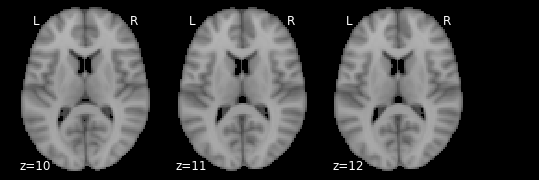

In [66]:
import matplotlib.pyplot as plt
plot_stat_map(img, threshold=3.0,
              display_mode='z', cut_coords=3, black_bg=True)

In [64]:
img = nib.load(op.join(train_folder, 'control', 'control_Caltech_0051480_session_1_anat_1_abide_cc.nii'))

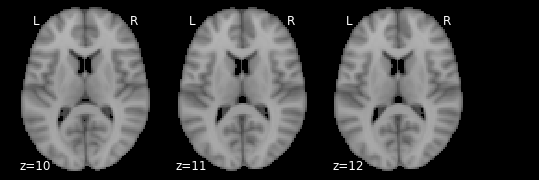

In [69]:
import matplotlib.pyplot as plt
plot_stat_map(img, threshold=3.0,
              display_mode='z', cut_coords=3, black_bg=True)